# 一个简单的分类

分类和回归是类似的。

可以用同一个神经网络做分类和回归

In [2]:
import torch # torch主库
import matplotlib.pyplot as plt # 画图库
import torch.nn.functional as F # 激活函数使用relu，这里单独import relu是为了简写
from torch.nn import Sequential

## 生成分类所需的数据，即，两个簇

torch.Size([100, 2])
torch.Size([100, 2])
torch.Size([100])
torch.Size([100, 2])
torch.Size([100])
torch.Size([200, 2])
torch.Size([200])


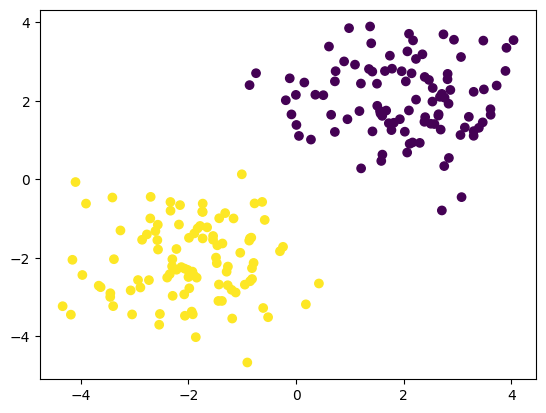

In [3]:
n_data = torch.ones(100,2)
print(n_data.shape)
x0= torch.normal(2*n_data,1) # torch.normal(均值（可以是张量），标准差)，生成正态数据
y0= torch.zeros(100)
print(x0.shape)
print(y0.shape)
x1= torch.normal(-2*n_data,1)
y1= torch.ones(100)
print(x1.shape)
print(y1.shape)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.LongTensor)
print(x.shape)
print(y.shape)
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

## 快速定义神经网络

回归问题中已经通过“面向对象”的方法定义了一个神经网络

但Torch给用户提供了一个更快捷的办法

In [4]:
net = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)

## 声明优化器和损失度量

In [5]:
criterion = torch.nn.CrossEntropyLoss() # 分类问题的惯用度量
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) # 定义优化器，很智能，只需要指明一个学习率就能运转。
plt.ion()
plt.show()

## 训练，以及训练过程的可视化

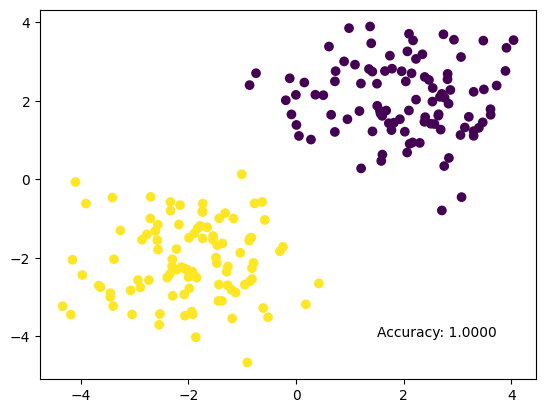

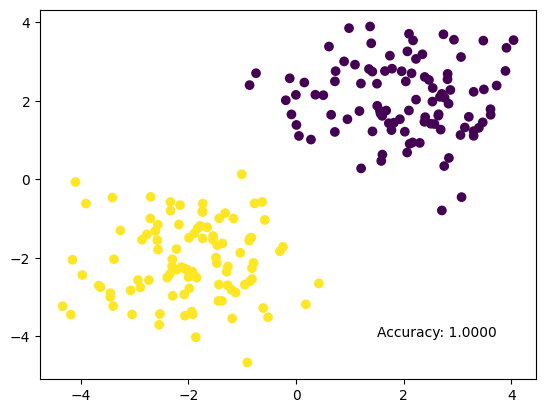

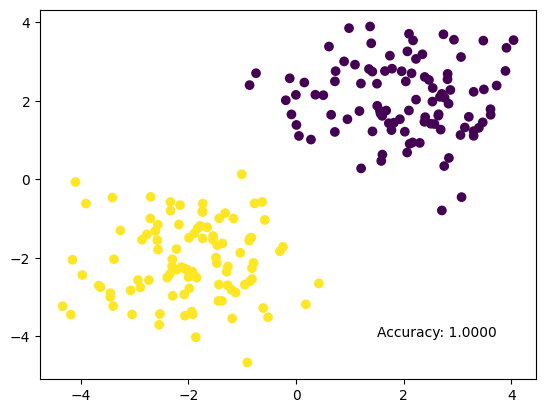

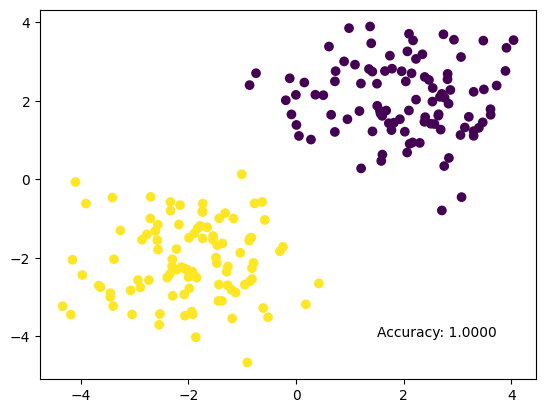

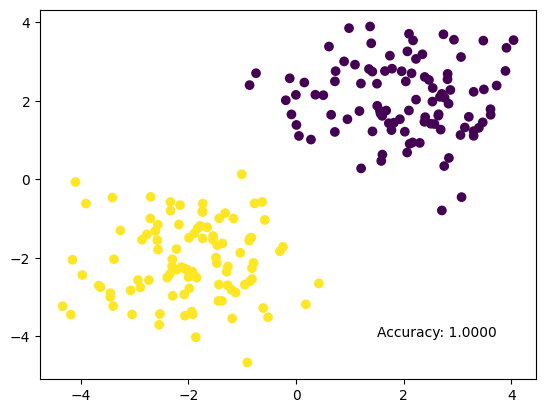

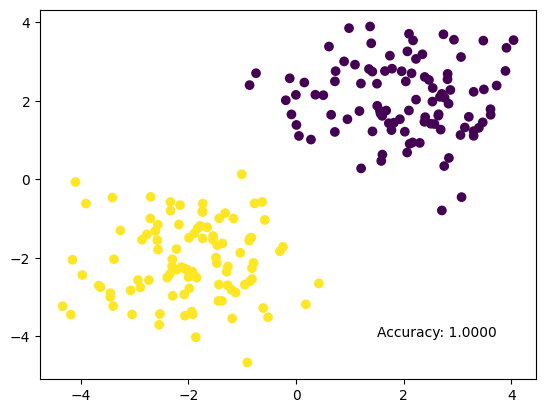

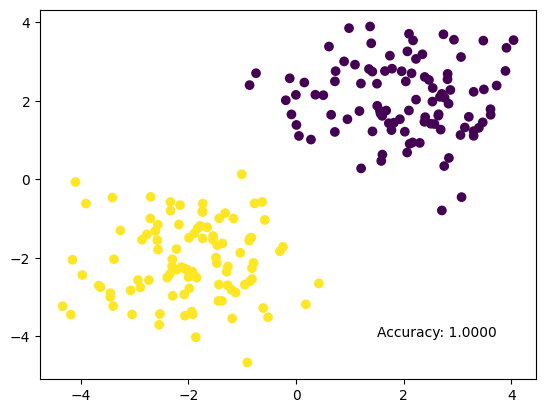

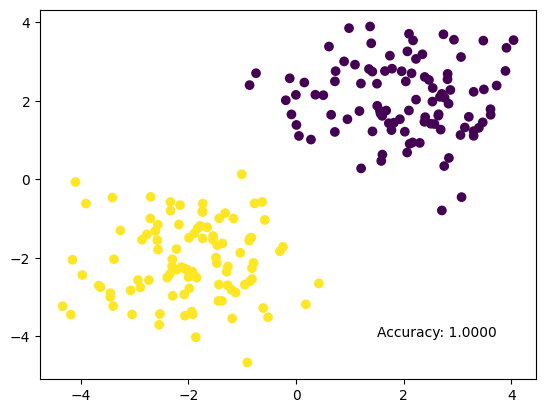

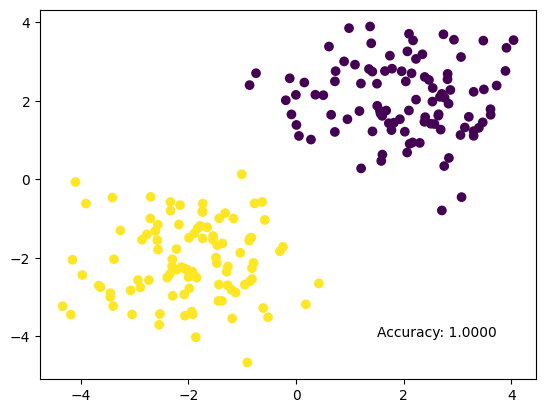

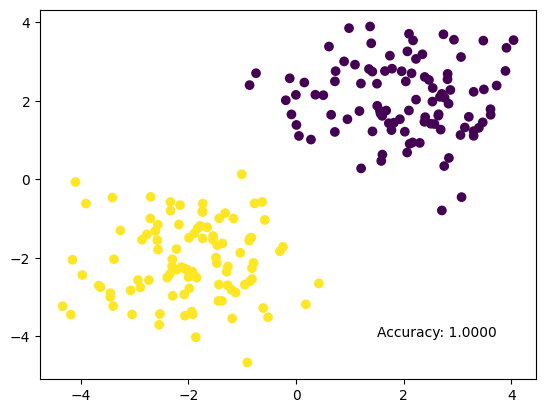

In [6]:
for epoch in range(100):
    output = net(x) # 把x传给net中的forward，隐式的

    loss = criterion(output, y) # 度量预测值和真实值之间的“知识损失”

    optimizer.zero_grad() # 给网络的梯度清零（不然会累加）
    loss.backward() # 反向传播“计算损失过程中的梯度”
    optimizer.step() # 通过参照反向传播更新了的梯度，更新神经网络中的权重

    if epoch % 10 == 0:
        plt.cla() # clear清空图像，搭配plt.ion使用的
        prediction = torch.max(F.softmax(output, dim=1), 1)[1]
        pred_y = prediction.data.squeeze()
        target_y = y.data

        plt.scatter(x[:,0], x[:,1], c=pred_y)
        accuracy = sum(pred_y == target_y) / len(pred_y)
        plt.text(1.5,-4, f'Accuracy: {accuracy:.4f}') # 添加文本(横坐标，纵坐标，文本内容)
        plt.pause(0.1)

plt.ioff()
plt.show()

## SL

In [9]:
torch.save(net, "models/net.pkl")
torch.save(net.state_dict(), "models/net_para.pkl")
net1 = torch.load("models/net.pkl", weights_only=False)
net2 = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,2)
)
net2 = torch.load("models/net_para.pkl")